In [1]:
import numpy as np
import scipy.stats
import os, os.path
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy.stats import binned_statistic_2d
import itertools as IT
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.interpolate import Rbf
from scipy.stats import kurtosis as get_kurt
from scipy.stats import skew as get_skew
from scipy.stats import iqr
import matplotlib.mlab as mlab
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import chisquare

In [2]:
# Creating Cosmic Event Object Definition

class create_cosmic_event(object):
    def __init__(self, comparison):

        self.comparison = comparison

        self.event_id = -np.inf
            
        self.trigger_status_1 = -np.inf
        self.mc_log_energy_1 = -np.inf
        self.reconstructed_log_energy_1 = -np.inf
        self.reconstructed_log_energy_err_1 = -np.inf
        self.mc_zenith_1 = -np.inf
        self.reconstructed_zenith_1 = -np.inf
        self.mc_azimuth_1 = -np.inf
        self.reconstructed_azimuth_1 = -np.inf
        self.mc_shower_axis_1 = -np.inf
        self.reconstructed_shower_axis_1 = -np.inf
        self.mc_shower_core_1 = -np.inf
        self.reconstructed_shower_core_1 = -np.inf
        self.full_station_id_vector_1 = -np.inf
        self.candidate_vector_1 = -np.inf
        self.dense_vector_1 = -np.inf
        self.accident_vector_1 = -np.inf
        self.rejected_vector_1 = -np.inf
        self.silent_vector_1 = -np.inf
        self.unknown_vector_1 = -np.inf
        self.random_vector_1 = -np.inf
        self.tot_vector_1 = -np.inf
        self.t1_vector_1 = -np.inf
        self.t2_vector_1 = -np.inf
        self.s1000_1 = -np.inf
        self.s1000_err_1 = -np.inf
        self.metric_1 = -np.inf

        if (self.comparison):
            self.trigger_status_2 = -np.inf
            self.mc_log_energy_2 = -np.inf
            self.reconstructed_log_energy_2 = -np.inf
            self.reconstructed_log_energy_err_2 = -np.inf
            self.mc_zenith_2 = -np.inf
            self.reconstructed_zenith_2 = -np.inf
            self.mc_azimuth_2 = -np.inf
            self.reconstructed_azimuth_2 = -np.inf
            self.mc_shower_axis_2 = -np.inf
            self.reconstructed_shower_axis_2 = -np.inf
            self.mc_shower_core_2 = -np.inf
            self.reconstructed_shower_core_2 = -np.inf
            self.full_station_id_vector_2 = -np.inf
            self.candidate_vector_2 = -np.inf
            self.dense_vector_2 = -np.inf
            self.accident_vector_2 = -np.inf
            self.rejected_vector_2 = -np.inf
            self.silent_vector_2 = -np.inf
            self.unknown_vector_2 = -np.inf
            self.random_vector_2 = -np.inf
            self.tot_vector_2 = -np.inf
            self.t1_vector_2 = -np.inf
            self.t2_vector_2 = -np.inf
            self.s1000_2 = -np.inf
            self.s1000_err_2 = -np.inf
            self.metric_2 = -np.inf

    def print_object(self):

        print("Event ID:")
        print(self.event_id) 
        
        print("Trigger Status 1:")
        print(self.trigger_status_1) 

        if(self.comparison):
            print("Trigger Status 2:")
            print(self.trigger_status_2) 
        
        print("MC Log Energy 1:")
        print(self.mc_log_energy_1)

        if(self.comparison): 
            print("MC Log Energy 2:")
            print(self.mc_log_energy_2) 

        print("Reconstructed Log Energy 1:")
        print(self.reconstructed_log_energy_1) 

        if(self.comparison):
            print("Reconstructed Log Energy 2:")
            print(self.reconstructed_log_energy_2) 

        print("Reconstructed Log Energy Err 1:")
        print(self.reconstructed_log_energy_err_1)

        if(self.comparison): 
            print("Reconstructed Log Energy Err 2:")
            print(self.reconstructed_log_energy_err_2)

        print("MC Zenith 1:") 
        print(self.mc_zenith_1)

        if(self.comparison):
            print("MC Zenith 2:")
            print(self.mc_zenith_2)
        
        print("Reconstructed Zenith 1:")
        print(self.reconstructed_zenith_1)

        if(self.comparison):
            print("Reconstructed Zenith 2:")
            print(self.reconstructed_zenith_2)

        print("MC Azimuth 1:") 
        print(self.mc_azimuth_1)

        if(self.comparison): 
            print("MC Azimuth 2:")
            print(self.mc_azimuth_2)

        print("Reconstructed Azimuth 1:")
        print(self.reconstructed_azimuth_1)

        if(self.comparison): 
            print("Reconstructed Azimuth 2:")
            print(self.reconstructed_azimuth_2)

        print("MC Shower Axis 1:") 
        print(self.mc_shower_axis_1)

        if(self.comparison): 
            print("MC Shower Axis 2:")
            print(self.mc_shower_axis_2)

        print("Reconstructed Shower Axis 1:") 
        print(self.reconstructed_shower_axis_1)

        if(self.comparison):
            print("Reconstructed Shower Axis 2:") 
            print(self.reconstructed_shower_axis_2)

        print("MC Shower Core 1:") 
        print(self.mc_shower_core_1)

        if(self.comparison):
            print("MC Shower Core 2:") 
            print(self.mc_shower_core_2) 

        print("Reconstructed Shower Core 1:")
        print(self.reconstructed_shower_core_1)

        if(self.comparison):
            print("Reconstructed Shower Core 2:") 
            print(self.reconstructed_shower_core_2) 

        print("Full Station ID Vector 1:")
        print(self.full_station_id_vector_1) 

        if(self.comparison):
            print("Full Station ID Vector 2:")
            print(self.full_station_id_vector_2)

        print("Candidate Vector 1:")
        print(self.candidate_vector_1)

        if(self.comparison): 
            print("Candidate Vector 2:")
            print(self.candidate_vector_2)

        print("Dense Vector 1:") 
        print(self.dense_vector_1) 

        if(self.comparison):
            print("Dense Vector 2:")
            print(self.dense_vector_2)

        print("Accident Vector 1:") 
        print(self.accident_vector_1)

        if(self.comparison):
            print("Accident Vector 2:") 
            print(self.accident_vector_2) 

        print("Rejected Vector 1:")
        print(self.rejected_vector_1)

        if(self.comparison):
            print("Rejected Vector 2:")
            print(self.rejected_vector_2) 

        print("Silent Vector 1:")
        print(self.silent_vector_1) 

        if(self.comparison):
            print("Silent Vector 2:")
            print(self.silent_vector_2) 

        print("Unknown Vector 1:")
        print(self.unknown_vector_1)

        if(self.comparison):
            print("Unknown Vector 2:") 
            print(self.unknown_vector_2) 

        print("Random Vector 1:")
        print(self.random_vector_1) 

        if(self.comparison):
            print("Random Vector 2:")
            print(self.random_vector_2)

        print("ToT Vector 1:") 
        print(self.tot_vector_1)

        if(self.comparison):
            print("ToT Vector 2:") 
            print(self.tot_vector_2) 

        print("T1 Vector 1:")
        print(self.t1_vector_1) 

        if(self.comparison):
            print("T1 Vector 2:")
            print(self.t1_vector_2) 

        print("T2 Vector 1:")
        print(self.t2_vector_1) 

        if(self.comparison):
            print("T2 Vector 2:")
            print(self.t2_vector_2) 

        print("S1000 1:")
        print(self.s1000_1)

        if(self.comparison): 
            print("S1000 2")
            print(self.s1000_2)

        print("S1000 Err 1:") 
        print(self.s1000_err_1)

        if(self.comparison): 
            print("S1000 Err 2:")
            print(self.s1000_err_2) 

        print("Metric 1:")
        print(self.metric_1)

        if(self.comparison):
            print("Metric 2:")
            print(self.metric_2)
   

In [5]:
# Confirm that Events were matched perfectly for both simulations

def check_completeness(shower_data):

    for i in range(len(shower_data)):
        if (shower_data[i].trigger_status_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Trigger Status 1.")
        if (shower_data[i].mc_log_energy_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Log Energy 1.")
        if (shower_data[i].reconstructed_log_energy_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Log Energy 1.")
        if (shower_data[i].reconstructed_log_energy_err_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Log Energy Error 1.")
        if (shower_data[i].mc_zenith_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Zenith 1.")
        if (shower_data[i].reconstructed_zenith_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Zenith 1.")
        if (shower_data[i].mc_azimuth_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Azimuth 1.")
        if (shower_data[i].reconstructed_azimuth_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Azimuth 1.")
        if (shower_data[i].mc_shower_axis_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Shower Axis 1.")
        if (shower_data[i].reconstructed_shower_axis_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Shower Axis 1.")
        if (shower_data[i].mc_shower_core_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Shower Core 1.")
        if (shower_data[i].reconstructed_shower_core_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Shower Core 1.")
        if (shower_data[i].full_station_id_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Full Station ID Vector 1.")
        if (shower_data[i].candidate_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Candidate Vector 1.")
        if (shower_data[i].dense_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Dense Vector 1.")
        if (shower_data[i].accident_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Accident Vector 1.")
        if (shower_data[i].rejected_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Rejected Vector 1.")
        if (shower_data[i].silent_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Silent Vector 1.")
        if (shower_data[i].unknown_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Unknown Vector 1.")
        if (shower_data[i].random_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete Random Vector 1.")
        if (shower_data[i].s1000_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete S1000 1.")
        if (shower_data[i].s1000_err_1 == -np.inf):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete S1000 Error 1.")
        if (shower_data[i].tot_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete ToT Vector 1.")
        if (shower_data[i].t1_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete T1 Vector 1.")
        if (shower_data[i].t2_vector_1 == -np.inf ):
            print("Event ID " + str(shower_data[i].event_id) + " has incomplete T2 Vector 1.")
        if (shower_data[i].metric_1 == -np.inf):
             print("Event ID " + str(shower_data[i].event_id) + " has incomplete Metric 1.")

        if (shower_data[i].comparison):
            if (shower_data[i].trigger_status_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Trigger Status 2.")
            if (shower_data[i].mc_log_energy_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Log Energy 2.")
            if (shower_data[i].reconstructed_log_energy_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Log Energy 2.")
            if (shower_data[i].reconstructed_log_energy_err_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Log Energy Error 2.")
            if (shower_data[i].mc_zenith_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Zenith 2.")
            if (shower_data[i].reconstructed_zenith_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Zenith 2.")
            if (shower_data[i].mc_azimuth_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Azimuth 2.")
            if (shower_data[i].reconstructed_azimuth_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Azimuth 2.")
            if (shower_data[i].mc_shower_axis_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Shower Axis 2.")
            if (shower_data[i].reconstructed_shower_axis_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Shower Axis 2.")
            if (shower_data[i].mc_shower_core_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete MC Shower Core 2.")
            if (shower_data[i].reconstructed_shower_core_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Reconstructed Shower Core 2.")
            if (shower_data[i].full_station_id_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Full Station ID Vector 2.")
            if (shower_data[i].candidate_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Candidate Vector 2.")
            if (shower_data[i].dense_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Dense Vector 2.")
            if (shower_data[i].accident_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Accident Vector 2.")
            if (shower_data[i].rejected_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Rejected Vector 2.")
            if (shower_data[i].silent_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Silent Vector 2.")
            if (shower_data[i].unknown_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Unknown Vector 2.")
            if (shower_data[i].random_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Random Vector 2.")
            if (shower_data[i].s1000_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete S2000 2.")
            if (shower_data[i].s1000_err_2 == -np.inf):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete S2000 Error 2.")
            if (shower_data[i].tot_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete ToT Vector 2.")
            if (shower_data[i].t2_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete T2 Vector 2.")
            if (shower_data[i].t2_vector_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete T2 Vector 2.")
            if (shower_data[i].metric_2 == -np.inf ):
                print("Event ID " + str(shower_data[i].event_id) + " has incomplete Metric 2.")



In [6]:
# Split data into untriggered, unreconstructed, and reconstructed

def clean_data(shower_data):

    untriggered_events_1 = []
    untriggered_events_2 = []

    unreconstructed_events_1 = []
    unreconstructed_events_2 = []

    reconstructed_events = []

    for i in range(len(shower_data)):

        if(shower_data[i].trigger_status_1 == 0):
            untriggered_events_1.append(shower_data[i])
        
        if(shower_data[i].trigger_status_1 != 0) and (shower_data[i].reconstructed_log_energy_1 == 0):
            unreconstructed_events_1.append(shower_data[i])

        if(shower_data[i].comparison):
            if(shower_data[i].trigger_status_2 == 0):
                untriggered_events_2.append(shower_data[i])

            if(shower_data[i].trigger_status_2 != 0) and (shower_data[i].reconstructed_log_energy_2 == 0):
                unreconstructed_events_2.append(shower_data[i])

        if(shower_data[i].comparison):
            if(shower_data[i].reconstructed_log_energy_1 != 0) and (shower_data[i].reconstructed_log_energy_2 != 0):
                reconstructed_events.append(shower_data[i])

        else:
            if(shower_data[i].reconstructed_log_energy_1 != 0):
                reconstructed_events.append(shower_data[i])
    
    if(shower_data[i].comparison):
        return untriggered_events_1, untriggered_events_2, unreconstructed_events_1, unreconstructed_events_2, reconstructed_events
    else:
        return untriggered_events_1, unreconstructed_events_1, reconstructed_events

In [7]:
def poisson_func(x, mu):
    y = []
    for i in range(len(x)):
        y.append(math.exp(-mu)*(mu**x[i])/(factorial(x[i])))
    
    return y 

def get_se_skew(N):

    return math.sqrt(((6*N)*(N-1))/((N-2)*(N+1)*(N+3)))

def get_se_kurtosis(N, var_skew):

    return math.sqrt((4*((N**2)-1)*var_skew)/((N-3)*(N+5)))

def flattening_res(x, A, B, C, D):
    y = []
    for i in range(len(x)):
        y.append(math.sqrt(A**2 + (B * math.exp(C * (x[i] - (18 + D))))**2))
    
    return y

In [6]:
# Make plots of varying types

def make_plots(reconstructed_events, plot_list, output_folder, lower_energy, upper_energy):
    for i in range(len(plot_list)):
        if (reconstructed_events[0].comparison):
            if (plot_list[i] == 1):
                residual_candidate_count = []
                mc_log_energy = []
                for i in range(len(reconstructed_events)):
                    residual_candidate_count.append(len(reconstructed_events[i].candidate_vector_2) - len(reconstructed_events[i].candidate_vector_1))
                    mc_log_energy.append(reconstructed_events[i].mc_log_energy_1)

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Number of Candidate Stations vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Thrown Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Residual of Candidate Stations (Full - Single)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                xbins = np.linspace(lower_energy, upper_energy, 25)
                ybins = np.linspace(0, 15, 15)
                mean_results = scipy.stats.binned_statistic(mc_log_energy, residual_candidate_count, statistic = 'mean', bins = xbins)
                std_results = scipy.stats.binned_statistic(mc_log_energy, residual_candidate_count, statistic = 'std', bins = xbins)
                means = mean_results.statistic
                std = std_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = std, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'black',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.hist2d(mc_log_energy, residual_candidate_count, bins = [xbins, ybins], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.savefig(output_folder + 'comparison_candidate_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()
        
            elif (plot_list[i] == 2):

                reconstructed_log_energy_1 = []
                reconstructed_log_energy_err_1 = []
                reconstructed_log_energy_2 = []
                reconstructed_log_energy_err_2 = []

                for i in range(len(reconstructed_events)):
                    reconstructed_log_energy_1.append(reconstructed_events[i].reconstructed_log_energy_1)
                    reconstructed_log_energy_err_1.append(reconstructed_events[i].reconstructed_log_energy_err_1)
                    reconstructed_log_energy_2.append(reconstructed_events[i].reconstructed_log_energy_2)
                    reconstructed_log_energy_err_2.append(reconstructed_events[i].reconstructed_log_energy_err_2)

                    
                # Energy Reconstructed vs. Energy Thrown
                fig= plt.figure(figsize=(10,8)) # Making plot bigger
                plt.title('Single Hex vs. Full Array Reconstructed Energy', fontsize = 25)
                plt.xlabel('Log of Reconstructed Energy (eV), Single Hex', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Log of Reconstructed Energy (eV), Full Array', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                corrected_error_1 = list(np.zeros(len(reconstructed_log_energy_err_1)))
                corrected_error_2 = list(np.zeros(len(reconstructed_log_energy_err_2)))
                for i in range(len(corrected_error_1)):
                    corrected_error_1[i] = abs(reconstructed_log_energy_1[i] - math.log10((10**reconstructed_log_energy_1[i])+(10**reconstructed_log_energy_err_1[i])))
                    corrected_error_2[i] = abs(reconstructed_log_energy_2[i] - math.log10((10**reconstructed_log_energy_2[i])+(10**reconstructed_log_energy_err_2[i])))
                plt.errorbar(x = reconstructed_log_energy_1, y = reconstructed_log_energy_2, xerr = corrected_error_1, yerr = corrected_error_2, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'black',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                x = np.linspace(17.0, 20.0, 10)
                y = np.linspace(17.0, 20.0, 10)
                plt.xlim(lower_energy-0.5, upper_energy+0.1)
                plt.ylim(lower_energy-0.5, upper_energy+0.1)
                plt.plot(x, y, '--')
                plt.savefig(output_folder + 'comparison_reconstructed_vs_simulation.jpg', bbox_inches=0, dpi=600)
                plt.show()

            elif (plot_list[i] == 3):

                full_station_id_vector_1 = []
                tot_vector_1 = []
                t1_vector_1 = []
                t2_vector_1 = []
                dense_vector_1 = []
                accident_vector_1 = []
                random_vector_1 = []
                silent_vector_1 = []
                unknown_vector_1 = []
                rejected_vector_1 = []
                mc_log_energy_1 = []
                full_station_id_vector_2 = []
                tot_vector_2 = []
                t1_vector_2 = []
                t2_vector_2 = []
                dense_vector_2 = []
                accident_vector_2 = []
                random_vector_2 = []
                silent_vector_2 = []
                unknown_vector_2 = []
                rejected_vector_2 = []
                mc_log_energy_2 = []

                for i in range(len(reconstructed_events)):
                    full_station_id_vector_1.append(reconstructed_events[i].full_station_id_vector_1)
                    tot_vector_1.append(reconstructed_events[i].tot_vector_1)
                    t1_vector_1.append(reconstructed_events[i].t1_vector_1)
                    t2_vector_1.append(reconstructed_events[i].t2_vector_1)
                    dense_vector_1.append(reconstructed_events[i].dense_vector_1)
                    accident_vector_1.append(reconstructed_events[i].accident_vector_1)
                    random_vector_1.append(reconstructed_events[i].random_vector_1)
                    silent_vector_1.append(reconstructed_events[i].silent_vector_1)
                    unknown_vector_1.append(reconstructed_events[i].unknown_vector_1)
                    rejected_vector_1.append(reconstructed_events[i].rejected_vector_1)
                    mc_log_energy_1.append(reconstructed_events[i].mc_log_energy_1)

                    full_station_id_vector_2.append(reconstructed_events[i].full_station_id_vector_2)
                    tot_vector_2.append(reconstructed_events[i].tot_vector_2)
                    t1_vector_2.append(reconstructed_events[i].t1_vector_2)
                    t2_vector_2.append(reconstructed_events[i].t2_vector_2)
                    dense_vector_2.append(reconstructed_events[i].dense_vector_2)
                    accident_vector_2.append(reconstructed_events[i].accident_vector_2)
                    random_vector_2.append(reconstructed_events[i].random_vector_2)
                    silent_vector_2.append(reconstructed_events[i].silent_vector_2)
                    unknown_vector_2.append(reconstructed_events[i].unknown_vector_2)
                    rejected_vector_2.append(reconstructed_events[i].rejected_vector_2)
                    mc_log_energy_2.append(reconstructed_events[i].mc_log_energy_2)

                # ToThreshold vs. Energy
                # Getting Total Stations
                total_stations_1 = []
                total_stations_2 = []
                for i in range(len(reconstructed_events)):
                    total_stations_1.append([x for x in full_station_id_vector_1[i] if x not in dense_vector_1[i] and x not in accident_vector_1[i] and x not in unknown_vector_1[i] and x not in rejected_vector_1[i] and x not in silent_vector_1[i] and x not in random_vector_1[i]])
                    tot_vector_1[i] = [x for x in tot_vector_1[i] if x not in dense_vector_1[i] and x not in accident_vector_1[i] and x not in unknown_vector_1[i] and x not in rejected_vector_1[i] and x not in silent_vector_1[i] and x not in random_vector_1[i]]
                    t1_vector_1[i] = [x for x in t1_vector_1[i] if x not in dense_vector_1[i] and x not in accident_vector_1[i] and x not in unknown_vector_1[i] and x not in rejected_vector_1[i] and x not in silent_vector_1[i] and x not in random_vector_1[i]]
                    t2_vector_1[i] = [x for x in t2_vector_1[i] if x not in dense_vector_1[i] and x not in accident_vector_1[i] and x not in unknown_vector_1[i] and x not in rejected_vector_1[i] and x not in silent_vector_1[i] and x not in random_vector_1[i]]
                    
                    total_stations_2.append([x for x in full_station_id_vector_2[i] if x not in dense_vector_2[i] and x not in accident_vector_2[i] and x not in unknown_vector_2[i] and x not in rejected_vector_2[i] and x not in silent_vector_2[i] and x not in random_vector_2[i]])
                    tot_vector_2[i] = [x for x in tot_vector_2[i] if x not in dense_vector_2[i] and x not in accident_vector_2[i] and x not in unknown_vector_2[i] and x not in rejected_vector_2[i] and x not in silent_vector_2[i] and x not in random_vector_2[i]]
                    t1_vector_2[i] = [x for x in t1_vector_2[i] if x not in dense_vector_2[i] and x not in accident_vector_2[i] and x not in unknown_vector_2[i] and x not in rejected_vector_2[i] and x not in silent_vector_2[i] and x not in random_vector_2[i]]
                    t2_vector_2[i] = [x for x in t2_vector_2[i] if x not in dense_vector_2[i] and x not in accident_vector_2[i] and x not in unknown_vector_2[i] and x not in rejected_vector_2[i] and x not in silent_vector_2[i] and x not in random_vector_2[i]]

                residual_tot_percentage_1 = []
                for i in range(len(total_stations_1)):
                    residual_tot_percentage_1.append(((len(tot_vector_2[i])/len(total_stations_2[i]))*100) - ((len(tot_vector_1[i])/len(total_stations_1[i]))*100))
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Residual Percentage of ToT Triggered Stations vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Throw Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Residual Percentage of Stations ToT Triggered', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                xbins = np.linspace(lower_energy, upper_energy, 50)
                ybins = np.linspace(0, 100, 20)
                mean_results = scipy.stats.binned_statistic(mc_log_energy_1, residual_tot_percentage_1, statistic = 'mean', bins = xbins)
                std_results = scipy.stats.binned_statistic(mc_log_energy_1, residual_tot_percentage_1, statistic = 'std', bins = xbins)
                means = mean_results.statistic
                std = std_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = std, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'red',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.hist2d(mc_log_energy_1, residual_tot_percentage_1, bins = [xbins, ybins], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.ylim(-1, 101)
                plt.savefig(output_folder + 'comparison_tot_trigger_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                residual_t1_percentage_1 = []
                for i in range(len(total_stations_1)):
                    residual_t1_percentage_1.append(((len(t1_vector_2[i])/len(total_stations_2[i]))*100) - ((len(t1_vector_1[i])/len(total_stations_1[i]))*100))
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Residual Percentage of T1 Triggered Stations vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Throw Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Residual Percentage of Stations T1 Triggered', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                xbins = np.linspace(lower_energy, upper_energy, 50)
                ybins = np.linspace(0, 100, 20)
                mean_results = scipy.stats.binned_statistic(mc_log_energy_1, residual_t1_percentage_1, statistic = 'mean', bins = xbins)
                std_results = scipy.stats.binned_statistic(mc_log_energy_1, residual_t1_percentage_1, statistic = 'std', bins = xbins)
                means = mean_results.statistic
                std = std_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = std, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'red',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_')
                plt.hist2d(mc_log_energy_1, residual_t1_percentage_1, bins = [xbins, ybins], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.ylim(-1, 101)
                plt.savefig(output_folder + 'comparison_t1_trigger_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                residual_t2_percentage_1 = []
                for i in range(len(total_stations_1)):
                    residual_t2_percentage_1.append(((len(t2_vector_2[i])/len(total_stations_2[i]))*100) - ((len(t2_vector_1[i])/len(total_stations_1[i]))*100))
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Residual Percentage of T2 Triggered Stations vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Throw Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Residual Percentage of Stations T2 Triggered', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                xbins = np.linspace(lower_energy, upper_energy, 50)
                ybins = np.linspace(0, 100, 20)
                mean_results = scipy.stats.binned_statistic(mc_log_energy_1, residual_t2_percentage_1, statistic = 'mean', bins = xbins)
                std_results = scipy.stats.binned_statistic(mc_log_energy_1, residual_t2_percentage_1, statistic = 'std', bins = xbins)
                means = mean_results.statistic
                std = std_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = std, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'red',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.hist2d(mc_log_energy_1, residual_t2_percentage_1, bins = [xbins, ybins], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.ylim(-1, 101)
                plt.savefig(output_folder + 'comparison_t2_trigger_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

            elif (plot_list[i] == 4):

                #Zenith vs. Energy vs. Candidate Counts
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Residual Candidate Counts vs. Thrown Energy vs. Zenith Angle', fontsize = 25)
                plt.xlabel('Log of Thrown Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('$Cos^2$(Zenith Angle (rad))', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                
                residual_candidate_count = []
                mc_zenith = []
                mc_log_energy = []
                for i in range(len(reconstructed_events)):
                    residual_candidate_count.append(len(reconstructed_events[i].candidate_vector_2) - len(reconstructed_events[i].candidate_vector_1))
                    mc_zenith.append(reconstructed_events[i].mc_zenith_1)
                    mc_log_energy.append(reconstructed_events[i].mc_log_energy_1)

                x = mc_log_energy
                y = (np.cos(mc_zenith))**2
                z = residual_candidate_count

                xbins = np.linspace(lower_energy, upper_energy, 25)
                ybins = np.linspace(0.3, 1.0, 25)

                ret = binned_statistic_2d(x, y, z, statistic=np.mean, bins= [xbins, ybins])
                array = ret.statistic
                array = array.T
                array = np.nan_to_num(array)
                plt.imshow(array, origin='lower', extent = [lower_energy, upper_energy, 0.3, 1.0], cmap = 'GnBu')
                cbar = plt.colorbar(label = 'Residual Number of Candidate Stations')
                cbar.ax.tick_params(labelsize=18)
                axes = plt.gca()
                axes.set_aspect((upper_energy-lower_energy)/(1-0.3))
                plt.savefig(output_folder + 'comparison_candidate_counts_vs_zenith_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

            elif (plot_list[i] == 5):

                reconstructed_log_energy_1 = []
                reconstructed_log_energy_2 = []
                mc_log_energy_1 = []
                mc_log_energy_2 = []
                for i in range(len(shower_data)):
                    reconstructed_log_energy_1.append(shower_data[i].reconstructed_log_energy_1)
                    reconstructed_log_energy_2.append(shower_data[i].reconstructed_log_energy_2)
                    mc_log_energy_1.append(shower_data[i].mc_log_energy_1)
                    mc_log_energy_2.append(shower_data[i].mc_log_energy_2)


                # MC Plots
                
                rec_1 = 10**(np.array(reconstructed_log_energy_1))
                mc_1 = 10**(np.array(mc_log_energy_1))
                res_1 = (rec_1 - mc_1)/mc_1
                rec_2 = 10**(np.array(reconstructed_log_energy_2))
                mc_2 = 10**(np.array(mc_log_energy_2))
                res_2 = (rec_2 - mc_2)/mc_2

                res = res_2 - res_1

                binning = np.linspace(lower_energy, upper_energy, int(((upper_energy - lower_energy)/(0.1)) + 1))
                new_resolution = []
                sub_resolution = []
                log_mc = np.log10(mc_1)
                for i in range(len(binning) - 1):
                    for j in range(len(mc_1)):
                        if (log_mc[j] > binning[i]) and (log_mc[j] <= binning[i + 1]):
                            sub_resolution.append(res[j])
                    new_resolution.append(sub_resolution)
                    sub_resolution = []

                mean = []
                mean_error = []
                stddev = []
                stddev_error = []
                skew = []
                skew_error = []
                kurt = []
                kurt_error = []

                fig=plt.figure()
                fig= plt.figure(figsize=(10,8))
                fig.suptitle('Residual Resolution Distributions vs. MC Bins', fontsize = 20)   

                for k in range(len(new_resolution)):

                    x = new_resolution[k]
                    nbins = 20
                    n2, bins2 = np.histogram(x,nbins);


                    text_bins = np.linspace(lower_energy, upper_energy, int(((upper_energy - lower_energy)/(0.1)) + 1))
                    ax = plt.subplot(2, 5,k+1)
                    ax.set_xlim(-0.8, 0.4)
                    ax.set_ylim(0, 8)
                    ax.title.set_text(str(text_bins[k]) + '-' + str(text_bins[k + 1]) + ' (log(eV))') 
                    ax.title.set_size(10)
                    ax.set_xlabel('Residual Resolution', fontsize = 9)
                    ax.set_ylabel('Count (normalized)', fontsize = 9)
                    

                
                    n, bins, patches = ax.hist(x,nbins, density=True, alpha = 0.5); 
                    centers = (0.5*(bins[1:]+bins[:-1]))
                    pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n)                
                    mean.append(pars[0])
                    stddev.append(pars[1])
                    skew.append(get_skew(n))
                    kurt.append(get_kurt(n))
                    error = np.sqrt(np.diag(cov))
                    mean_error.append(error[0])
                    stddev_error.append(error[1])

                    N = sum(n)
                    se_skew = get_se_skew(N)
                    se_kurt = get_se_kurtosis(N, se_skew**2)
                    skew_error.append(se_skew)
                    kurt_error.append(se_kurt)

                    l = norm.pdf(centers, *pars)
                    interp_gauss = Rbf(centers, l, function='gaussian')
                    gauss_x = np.linspace(-1, 1, 50)
                    gauss_y = interp_gauss(gauss_x)

                    chi_sq = 0
                    for i in range(len(l)):
                        if (n2[i] > 5):
                            chi_sq += ((n[i]-l[i])**2/l[i])
                                    
                    
                    ax.plot(gauss_x, gauss_y, 'k--',linewidth = 2, label= '$\mu$ = ' + str(round(pars[0],2)) + '$\pm$ ' + str(round(error[0],3)) + ', $\sigma$ = ' + str(round(pars[1],2)) + '$\pm$' + str(round(error[1],3))) 

                    n_tot = np.sum(n)
                    n_tot_err = np.sqrt(np.sum(n))
                    d_err = []

                    for i in range(len(n)):
                        d_err.append(np.sqrt((np.sqrt(n[i]/(n_tot))**2) + (((-n[i]*n_tot_err)/((n_tot**2)))**2)))


                    ax.errorbar(x = centers, y = n, yerr = d_err,
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                    ax.plot([], [], ' ', label="$\chi^{2}$ = " + str(round(chi_sq,2)))

                    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 5.5})
                    
                fig.tight_layout()
                plt.savefig(output_folder + 'comparison_resolution_vs_mc_bins.jpg', bbox_inches=0, dpi=600)
                plt.show()

                #centers = [18.55, 18.65, 18.75, 18.85, 18.95, 19.05, 19.15, 19.25, 19.35, 19.45]
                centers = list(np.around(np.linspace(lower_energy + 0.05, upper_energy + 0.05, int(((upper_energy - lower_energy)/(0.1)) + 1)),2))
                del centers[-1]

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Residual Mean vs. MC. Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Residual Mean (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = mean, yerr = mean_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,mean,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                mean_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,mean_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'comparison_mean_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Residual Std. Dev. vs. MC. Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Residual Std. Dev. (resolution)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = stddev, yerr = stddev_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                
                x = np.linspace(lower_energy, upper_energy, 1000)
                parameters, covariance = curve_fit(flattening_res, centers, stddev, p0 = [0.0995, 0.001, -4.2, 1.725])
                fit_y = flattening_res(x, parameters[0], parameters[1], parameters[2], parameters[3])


                plt.plot(x,fit_y, '--',color='blue',label='p[0] = ' + str(round(parameters[0],2)) + ', p[1] = ' + str(round(parameters[1],2)) + ', p[2] = ' + str(round(parameters[2],2)) + ', p[3] = ' + str(round(parameters[3], 2)))

                plt.legend()
                plt.savefig(output_folder + 'comparison_stddev_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Residual Skew vs. MC Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Residual Skew (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = skew, yerr = skew_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,skew,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                skew_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,skew_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'comparison_skew_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Residual Kurtosis vs. MC Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Residual Kurtosis (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = kurt, yerr = kurt_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,kurt,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                kurt_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,kurt_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'comparison_kurt_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

            elif (plot_list[i] == 6):

                #Residual Energy Plot

                single_hex_energy = []
                full_array_energy = []

                for i in range(len(reconstructed_events)):
                    single_hex_energy.append(reconstructed_events[i].reconstructed_log_energy_1)
                    full_array_energy.append(reconstructed_events[i].reconstructed_log_energy_2)

                bin_edges = np.linspace(lower_energy, upper_energy, int(((upper_energy-lower_energy)/0.1) + 1))

                sh_hist, _ = np.histogram(single_hex_energy, bin_edges)
                fa_hist, _ = np.histogram(single_hex_energy, bin_edges)

                sh_n_events = sum(sh_hist)
                fa_n_events = sum(fa_hist)

                norm_sh_hist = sh_hist / sh_n_events
                norm_fa_hist = fa_hist /fa_n_events

                norm_sh_hist_error = []
                norm_fa_hist_error = []
                for i in range(len(norm_sh_hist)):
                    norm_sh_hist_error.append(sqrt(sh_hist[i]) / sh_n_events)
                    norm_fa_hist_error.append(sqrt(fa_hist[i]) / fa_n_events)

                norm_residual_energy = []
                norm_residual_energy_error = []
                for i in range(len(norm_sh_hist)):
                    norm_residual_energy.append(norm_sh_hist_error[i] - norm_fa_hist_error[i])
                    norm_residual_energy_error.append(sqrt(norm_sh_hist_error[i] **2 + norm_fa_hist_error[i]**2))

                bin_centers = (0.5*(bin_edges[1:]+bin_edges[:-1]))

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Normalized Residual Energy', fontsize = 25)
                plt.xlabel('Reconstructed Log Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Normalized Residual (Single Hex - Full Array)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = bin_centers, y = norm_residual_energy, yerr = norm_residual_energy_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                
                plt.savefig(output_folder + 'nrom_residual_energy_vs_reconstructed_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()



        else:
            if   (plot_list[i] == 1):
                candidate_count = []
                mc_log_energy = []
                for i in range(len(reconstructed_events)):
                    candidate_count.append(len(reconstructed_events[i].candidate_vector_1))
                    mc_log_energy.append(reconstructed_events[i].mc_log_energy_1)

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Number of Candidate Stations vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Thrown Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Number of Candidate Stations', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                xbins = np.linspace(lower_energy, upper_energy, 25)
                ybins = np.linspace(0, 15, 15)
                mean_results = scipy.stats.binned_statistic(mc_log_energy, candidate_count, statistic = 'mean', bins = xbins)
                std_results = scipy.stats.binned_statistic(mc_log_energy, candidate_count, statistic = 'std', bins = xbins)
                means = mean_results.statistic
                std = std_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = std, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'black',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.hist2d(mc_log_energy, candidate_count, bins = [xbins, ybins], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.savefig(output_folder + 'candidate_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

            elif (plot_list[i] == 2):

                mc_log_energy = []
                reconstructed_log_energy = []
                reconstructed_log_energy_err = []

                for i in range(len(reconstructed_events)):
                    mc_log_energy.append(reconstructed_events[i].mc_log_energy_1)
                    reconstructed_log_energy.append(reconstructed_events[i].reconstructed_log_energy_1)
                    reconstructed_log_energy_err.append(reconstructed_events[i].reconstructed_log_energy_err_1)
                    

                # Energy Reconstructed vs. Energy Thrown
                fig= plt.figure(figsize=(10,8)) # Making plot bigger
                plt.title('Energy Reconstructed vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Thrown Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Log of Reconstructed Energy (eV)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.hist2d(mc_log_energy,reconstructed_log_energy, bins = [np.linspace(lower_energy-0.5,upper_energy+0.1,30),np.linspace(lower_energy-0.5,upper_energy+0.1,30)], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                corrected_error = list(np.zeros(len(reconstructed_log_energy_err)))
                for i in range(len(corrected_error)):
                    corrected_error[i] = abs(reconstructed_log_energy[i] - math.log10((10**reconstructed_log_energy[i])+(10**reconstructed_log_energy_err[i])))
                mean_results = scipy.stats.binned_statistic(mc_log_energy, reconstructed_log_energy, statistic = 'mean', bins = [np.linspace(lower_energy-0.5,upper_energy+0.1,30)])
                error_results = scipy.stats.binned_statistic(mc_log_energy, corrected_error, statistic = 'mean', bins = [np.linspace(lower_energy-0.5,upper_energy+0.1,30)])
                means = mean_results.statistic
                error = error_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = error, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'black',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                x = np.linspace(17.0, 20.0, 10)
                y = np.linspace(17.0, 20.0, 10)
                plt.xlim(lower_energy-0.5, upper_energy+0.1)
                plt.ylim(lower_energy-0.5, upper_energy+0.1)
                plt.plot(x, y, '--')
                plt.savefig(output_folder + 'reconstructed_vs_thrown.jpg', bbox_inches=0, dpi=600)
                plt.show()

            elif (plot_list[i] == 3):
                
                full_station_id_vector = []
                tot_vector = []
                t1_vector = []
                t2_vector = []
                dense_vector = []
                accident_vector = []
                random_vector = []
                silent_vector = []
                unknown_vector = []
                rejected_vector = []
                mc_log_energy = []

                for i in range(len(reconstructed_events)):
                    full_station_id_vector.append(reconstructed_events[i].full_station_id_vector_1)
                    tot_vector.append(reconstructed_events[i].tot_vector_1)
                    t1_vector.append(reconstructed_events[i].t1_vector_1)
                    t2_vector.append(reconstructed_events[i].t2_vector_1)
                    dense_vector.append(reconstructed_events[i].dense_vector_1)
                    accident_vector.append(reconstructed_events[i].accident_vector_1)
                    random_vector.append(reconstructed_events[i].random_vector_1)
                    silent_vector.append(reconstructed_events[i].silent_vector_1)
                    unknown_vector.append(reconstructed_events[i].unknown_vector_1)
                    rejected_vector.append(reconstructed_events[i].rejected_vector_1)
                    mc_log_energy.append(reconstructed_events[i].mc_log_energy_1)
        

                # ToThreshold vs. Energy
                # Getting Total Stations
                total_stations = []
                for i in range(len(reconstructed_events)):
                    total_stations.append([x for x in full_station_id_vector[i] if x not in dense_vector[i] and x not in accident_vector[i] and x not in unknown_vector[i] and x not in rejected_vector[i] and x not in silent_vector[i] and x not in random_vector[i]])
                    tot_vector[i] = [x for x in tot_vector[i] if x not in dense_vector[i] and x not in accident_vector[i] and x not in unknown_vector[i] and x not in rejected_vector[i] and x not in silent_vector[i] and x not in random_vector[i]]
                    t1_vector[i] = [x for x in t1_vector[i] if x not in dense_vector[i] and x not in accident_vector[i] and x not in unknown_vector[i] and x not in rejected_vector[i] and x not in silent_vector[i] and x not in random_vector[i]]
                    t2_vector[i] = [x for x in t2_vector[i] if x not in dense_vector[i] and x not in accident_vector[i] and x not in unknown_vector[i] and x not in rejected_vector[i] and x not in silent_vector[i] and x not in random_vector[i]]


                tot_percentage = []
                for i in range(len(total_stations)):
                    tot_percentage.append((len(tot_vector[i])/len(total_stations[i]))*100)
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Percentage of ToT Triggered Stations vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Throw Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Percent of Stations ToT Triggered', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                xbins = np.linspace(lower_energy, upper_energy, 50)
                ybins = np.linspace(0, 100, 20)
                mean_results = scipy.stats.binned_statistic(mc_log_energy, tot_percentage, statistic = 'mean', bins = xbins)
                std_results = scipy.stats.binned_statistic(mc_log_energy, tot_percentage, statistic = 'std', bins = xbins)
                means = mean_results.statistic
                std = std_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = std, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'black',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.hist2d(mc_log_energy, tot_percentage, bins = [xbins, ybins], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.ylim(-1, 101)
                plt.savefig(output_folder + 'tot_trigger_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()


                t1_percentage = []
                for i in range(len(total_stations)):
                    t1_percentage.append((len(t1_vector[i])/len(total_stations[i]))*100)
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Percentage of T1 Triggers vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Thrown Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Percentage of Stations T1 Triggered', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                mean_results = scipy.stats.binned_statistic(mc_log_energy, t1_percentage, statistic = 'mean', bins = xbins)
                std_results = scipy.stats.binned_statistic(mc_log_energy, t1_percentage, statistic = 'std', bins = xbins)
                means = mean_results.statistic
                std = std_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = std, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'black',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.hist2d(mc_log_energy,t1_percentage, bins = [xbins, ybins], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.ylim(-1, 101)
                plt.savefig(output_folder + 't1_trigger_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()


                t2_percentage = []
                for i in range(len(total_stations)):
                    t2_percentage.append((len(t2_vector[i])/len(total_stations[i]))*100)
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Percentage of T2 Triggers vs. Thrown Energy', fontsize = 25)
                plt.xlabel('Log of Thrown Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Percentage of Stations T2 Triggered', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                mean_results = scipy.stats.binned_statistic(mc_log_energy, t2_percentage, statistic = 'mean', bins = xbins)
                std_results = scipy.stats.binned_statistic(mc_log_energy, t2_percentage, statistic = 'std', bins = xbins)
                means = mean_results.statistic
                std = std_results.statistic
                bin_edges = mean_results.bin_edges
                bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
                plt.errorbar(x = bin_centers, y = means, yerr = std, 
                            fmt = 'ro',
                            ms = 8,
                            ecolor = 'black',
                            elinewidth = 1.5,			
                            capsize = 3, 
                            capthick = 1.5, 
                            marker = '_') 
                plt.hist2d(mc_log_energy,t2_percentage, bins = [xbins, ybins], cmap='GnBu')
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.ylim(-1, 101)
                plt.savefig(output_folder + 't2_trigger_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

            elif (plot_list[i] == 4):
                #Zenith vs. Energy vs. Candidate Counts
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Candidate Counts vs. Thrown Energy vs. Zenith Angle', fontsize = 25)
                plt.xlabel('Log of Thrown Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('$Cos^2$(Zenith Angle (rad))', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                
                candidate_count = []
                mc_zenith = []
                mc_log_energy = []
                for i in range(len(reconstructed_events)):
                    candidate_count.append(len(reconstructed_events[i].candidate_vector_1))
                    mc_zenith.append(reconstructed_events[i].mc_zenith_1)
                    mc_log_energy.append(reconstructed_events[i].mc_log_energy_1)

                x = mc_log_energy
                y = (np.cos(mc_zenith))**2
                z = candidate_count

                xbins = np.linspace(lower_energy, upper_energy, 25)
                ybins = np.linspace(0.3, 1.0, 25)

                ret = binned_statistic_2d(x, y, z, statistic=np.mean, bins= [xbins, ybins])
                array = ret.statistic
                array = array.T
                array = np.nan_to_num(array)
                plt.imshow(array, origin='lower', extent = [lower_energy, upper_energy, 0.3, 1.0], cmap = 'GnBu')
                cbar = plt.colorbar(label = 'Number of Candidate Stations')
                cbar.ax.tick_params(labelsize=18)
                axes = plt.gca()
                axes.set_aspect((upper_energy-lower_energy)/(1-0.3))
                plt.savefig(output_folder + 'candidate_counts_vs_zenith_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

            elif (plot_list[i] == 5):
                
                mc_log_energy = []
                mc_zenith = []
                for i in range(len(reconstructed_events)):
                    mc_log_energy.append(reconstructed_events[i].mc_log_energy_1)
                    mc_zenith.append(reconstructed_events[i].mc_zenith_1)

                #Making the Number of Counts vs. Energy
                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Number of Events vs. Thrown Energy vs. Zenith Angle', fontsize = 25, y = 1.03)
                plt.xlabel('Log of Thrown Energy (eV)', fontsize = 20) # Labeling the x-axis
                plt.ylabel('$Cos^2$(Zenith Angle (rad))', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)

                x = mc_log_energy
                y = list((np.cos(np.array(mc_zenith)))**2)
                
                bin_number = 25
                xbins = np.linspace(lower_energy, upper_energy, bin_number)
                ybins = np.linspace(0.3, 1.0, bin_number)

                h, _, _, _ = plt.hist2d(x,y, bins = [xbins, ybins], cmap = "GnBu")
                axes = plt.gca()
                axes.set_aspect((upper_energy-lower_energy)/(1-0.3))
                cbar = plt.colorbar()
                cbar.ax.tick_params(labelsize=18)
                plt.savefig(output_folder + 'events_vs_zenith_vs_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()          

                # Testing Flatness
                bin_width = [4,6,10]

                for q in range(len(bin_width)):
                    distribution = h.flatten()
                    bins = np.arange(0, max(distribution), bin_width[q])
                    entries, bin_edges, patches = plt.hist(distribution, bins=bins, density=True, label='Data', stacked = True)
                    non_norm_n, bins, patches = plt.hist(distribution, bins = bins, alpha = 0.5)
                    non_norm_bin_centers = 0.5 * (bins[1:] + bins[:-1])     
                    
                    n_err = []
                    for i in range(len(non_norm_n)):
                        n_err.append(np.sqrt(non_norm_n[i]))
                    plt.clf()

                    fig= plt.figure(figsize=(12,8)) # Making plot bigger
                    plt.title('Testing Flatness of Data, Bin Width = ' + str(bin_width[q]), fontsize = 25)
                    plt.xlabel('Events in Bin', fontsize = 20) # Labeling the x-axis
                    plt.ylabel('Normalized Count', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                    plt.xticks(fontsize = 18)
                    plt.yticks(fontsize = 18)
                    
                    bins = np.arange(0, max(distribution), bin_width[q])
                    n, bin_edges, patches = plt.hist(distribution, bins = bins, density = True, alpha = 0.5)
                    bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])
                
                    scale = n[0] / non_norm_n[0]
                    for i in range(len(n_err)):
                        n_err[i] = scale * n_err[i]
                    
                    plt.errorbar(x = bin_middles, y = n, yerr = n_err,
                        fmt = 'ro',
                        ms = 8,
                        ecolor = 'black',
                        elinewidth = 1.5,			
                        capsize = 3, 
                        capthick = 1.5, 
                        marker = '_') 
                
                    # fit with curve_fit
                    mean = sum(distribution)/(bin_number**2)
                    std_dev = np.std(distribution)
                    pois_parameters, pois_cov_matrix = curve_fit(poisson_func, bin_middles, entries, p0 = mean)
                    gauss_parameters, gauss_cov_matrix = curve_fit(norm.pdf, bin_middles, entries, p0 = [mean, std_dev])
                    x_plot = np.arange(100)

                    k = poisson_func(bin_middles, *pois_parameters)
                    l = norm.pdf(bin_middles, *gauss_parameters)
                    gauss_chi_sq = 0
                    pois_chi_sq = 0
                    for i in range(len(l)):
                        if (n[i] > 0):
                            gauss_chi_sq += (((n[i]-l[i])**2)/l[i])
                            pois_chi_sq += (((n[i]-k[i])**2)/k[i])

                    red_gauss_chi_sq = gauss_chi_sq / (len(bin_middles) - 2)
                    red_pois_chi_sq = pois_chi_sq / (len(bin_middles) - 1)

                    plt.axvline(x = mean, color = 'green', linestyle = '--', label = 'Mean = ' + str(round(mean,2)))
                    plt.plot(x_plot, poisson_func(x_plot, *pois_parameters), 'red', linestyle = '--', linewidth = 2, label = "Poisson: $\lambda$ = " + str(round(pois_parameters[0], 2)) + ', $\chi^{2}$ = ' + f"{pois_chi_sq:.2}" + ', $\chi_{v}$ = ' + f"{red_pois_chi_sq:.2}")
                    plt.plot(x_plot, norm.pdf(x_plot, *gauss_parameters), 'blue', linestyle = '--', linewidth = 2, label = "Gaussian: $\mu$ = " + str(round(gauss_parameters[0], 2)) + ', $\sigma$ = ' + str(round(gauss_parameters[1], 2)) + ', $\chi^{2}$ = ' + f"{gauss_chi_sq:.2}" + ', $\chi_{v}$ = ' + f"{red_gauss_chi_sq:.2}")
                    plt.legend()
                    #plt.savefig(output_folder + 'testing_flatness_' + str(bin_width[q]) + '.jpg', bbox_inches=0, dpi=600)
                    plt.show()
                
            elif (plot_list[i] == 6):

                reconstructed_log_energy = []
                mc_log_energy = []
                for i in range(len(shower_data)):
                    reconstructed_log_energy.append(shower_data[i].reconstructed_log_energy_1)
                    mc_log_energy.append(shower_data[i].mc_log_energy_1)


                # MC Plots
                
                rec = 10**(np.array(reconstructed_log_energy))
                mc = 10**(np.array(mc_log_energy))
                res = (rec - mc)/mc

                binning = np.linspace(lower_energy, upper_energy, int(((upper_energy - lower_energy)/(0.1)) + 1))
                new_resolution = []
                sub_resolution = []
                log_mc = np.log10(mc)
                for i in range(len(binning) - 1):
                    for j in range(len(mc)):
                        if (log_mc[j] > binning[i]) and (log_mc[j] <= binning[i + 1]):
                            sub_resolution.append(res[j])
                    new_resolution.append(sub_resolution)
                    sub_resolution = []

                mean = []
                mean_error = []
                stddev = []
                stddev_error = []
                skew = []
                skew_error = []
                kurt = []
                kurt_error = []

                fig=plt.figure()
                fig= plt.figure(figsize=(10,8))
                fig.suptitle('Resolution Distributions vs. MC Bins', fontsize = 20)   

                for k in range(len(new_resolution)):

                    x = new_resolution[k]
                    nbins = 20
                    n2, bins2 = np.histogram(x,nbins);


                    text_bins = np.linspace(lower_energy, upper_energy, int(((upper_energy - lower_energy)/(0.1)) + 1))
                    ax = plt.subplot(2, 5,k+1)
                    ax.set_xlim(-0.8, 0.4)
                    ax.set_ylim(0, 8)
                    ax.title.set_text(str(text_bins[k]) + '-' + str(text_bins[k + 1]) + ' (log(eV))') 
                    ax.title.set_size(10)
                    ax.set_xlabel('Resolution', fontsize = 9)
                    ax.set_ylabel('Count (normalized)', fontsize = 9)
                    

                
                    n, bins, patches = ax.hist(x,nbins, density=True, alpha = 0.5); 
                    centers = (0.5*(bins[1:]+bins[:-1]))
                    pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n)                
                    mean.append(pars[0])
                    stddev.append(pars[1])
                    skew.append(get_skew(n))
                    kurt.append(get_kurt(n))
                    error = np.sqrt(np.diag(cov))
                    mean_error.append(error[0])
                    stddev_error.append(error[1])

                    N = sum(n)
                    se_skew = get_se_skew(N)
                    se_kurt = get_se_kurtosis(N, se_skew**2)
                    skew_error.append(se_skew)
                    kurt_error.append(se_kurt)

                    l = norm.pdf(centers, *pars)
                    interp_gauss = Rbf(centers, l, function='gaussian')
                    gauss_x = np.linspace(-1, 1, 50)
                    gauss_y = interp_gauss(gauss_x)

                    chi_sq = 0
                    for i in range(len(l)):
                        if (n2[i] > 5):
                            chi_sq += ((n[i]-l[i])**2/l[i])
                                    
                    
                    ax.plot(gauss_x, gauss_y, 'k--',linewidth = 2, label= '$\mu$ = ' + str(round(pars[0],2)) + '$\pm$ ' + str(round(error[0],3)) + ', $\sigma$ = ' + str(round(pars[1],2)) + '$\pm$' + str(round(error[1],3))) 

                    n_tot = np.sum(n)
                    n_tot_err = np.sqrt(np.sum(n))
                    d_err = []

                    for i in range(len(n)):
                        d_err.append(np.sqrt((np.sqrt(n[i]/(n_tot))**2) + (((-n[i]*n_tot_err)/((n_tot**2)))**2)))


                    ax.errorbar(x = centers, y = n, yerr = d_err,
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                    ax.plot([], [], ' ', label="$\chi^{2}$ = " + str(round(chi_sq,2)))

                    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 5.5})
                    
                fig.tight_layout()
                plt.savefig(output_folder + 'resolution_vs_mc_bins.jpg', bbox_inches=0, dpi=600)
                plt.show()

                #centers = [18.55, 18.65, 18.75, 18.85, 18.95, 19.05, 19.15, 19.25, 19.35, 19.45]
                centers = list(np.around(np.linspace(lower_energy + 0.05, upper_energy + 0.05, int(((upper_energy - lower_energy)/(0.1)) + 1)),2))
                del centers[-1]

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Mean vs. MC. Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Mean (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = mean, yerr = mean_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,mean,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                mean_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,mean_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'mean_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Std. Dev. vs. MC. Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Std. Dev. (resolution)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = stddev, yerr = stddev_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                
                x = np.linspace(lower_energy, upper_energy, 1000)
                parameters, covariance = curve_fit(flattening_res, centers, stddev, p0 = [0.0995, 0.001, -4.2, 1.725])
                fit_y = flattening_res(x, parameters[0], parameters[1], parameters[2], parameters[3])


                plt.plot(x,fit_y, '--',color='blue',label='p[0] = ' + str(round(parameters[0],2)) + ', p[1] = ' + str(round(parameters[1],2)) + ', p[2] = ' + str(round(parameters[2],2)) + ', p[3] = ' + str(round(parameters[3], 2)))

                plt.legend()
                plt.savefig(output_folder + 'stddev_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Skew vs. MC Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Skew (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = skew, yerr = skew_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,skew,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                skew_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,skew_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'skew_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Kurtosis vs. MC Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Kurtosis (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = kurt, yerr = kurt_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,kurt,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                kurt_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,kurt_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'kurt_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                # Reconstructed Bin Plots

                binning = np.linspace(lower_energy, upper_energy, int(((upper_energy - lower_energy)/(0.1)) + 1))
                new_resolution = []
                sub_resolution = []
                log_rec = np.log10(rec)
                for i in range(len(binning) - 1):
                    for j in range(len(mc)):
                        if (log_rec[j] > binning[i]) and (log_rec[j] <= binning[i + 1]):
                            sub_resolution.append(res[j])
                    new_resolution.append(sub_resolution)
                    sub_resolution = []

                mean = []
                mean_error = []
                stddev = []
                stddev_error = []
                skew = []
                skew_error = []
                kurt = []
                kurt_error = []

                fig=plt.figure()
                fig= plt.figure(figsize=(10,8))
                fig.suptitle('Resolution Distributions vs. Reconstructed Bins', fontsize = 20)   

                for k in range(len(new_resolution)):

                    x = new_resolution[k]
                    nbins = 20
                    n2, bins2 = np.histogram(x,nbins);


                    text_bins = np.linspace(lower_energy, upper_energy, int(((upper_energy - lower_energy)/(0.1)) + 1))
                    ax = plt.subplot(2, 5,k+1)
                    ax.set_xlim(-0.8, 0.4)
                    ax.set_ylim(0, 8)
                    ax.title.set_text(str(text_bins[k]) + '-' + str(text_bins[k + 1]) + ' (log(eV))') 
                    ax.title.set_size(10)
                    ax.set_xlabel('Resolution', fontsize = 9)
                    ax.set_ylabel('Count (normalized)', fontsize = 9)
                    

                
                    n, bins, patches = ax.hist(x,nbins, density=True, alpha = 0.5); 
                    centers = (0.5*(bins[1:]+bins[:-1]))
                    pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n)                
                    mean.append(pars[0])
                    stddev.append(pars[1])
                    skew.append(get_skew(n))
                    kurt.append(get_kurt(n))
                    error = np.sqrt(np.diag(cov))
                    mean_error.append(error[0])
                    stddev_error.append(error[1])

                    N = sum(n)
                    se_skew = get_se_skew(N)
                    se_kurt = get_se_kurtosis(N, se_skew**2)
                    skew_error.append(se_skew)
                    kurt_error.append(se_kurt)

                    l = norm.pdf(centers, *pars)
                    interp_gauss = Rbf(centers, l, function='gaussian')
                    gauss_x = np.linspace(-1, 1, 50)
                    gauss_y = interp_gauss(gauss_x)

                    chi_sq = 0
                    for i in range(len(l)):
                        if (n2[i] > 5):
                            chi_sq += ((n[i]-l[i])**2/l[i])
                                    
                    
                    ax.plot(gauss_x, gauss_y, 'k--',linewidth = 2, label= '$\mu$ = ' + str(round(pars[0],2)) + '$\pm$ ' + str(round(error[0],3)) + ', $\sigma$ = ' + str(round(pars[1],2)) + '$\pm$' + str(round(error[1],3))) 

                    n_tot = np.sum(n)
                    n_tot_err = np.sqrt(np.sum(n))
                    d_err = []

                    for i in range(len(n)):
                        d_err.append(np.sqrt((np.sqrt(n[i]/(n_tot))**2) + (((-n[i]*n_tot_err)/((n_tot**2)))**2)))


                    ax.errorbar(x = centers, y = n, yerr = d_err,
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                    ax.plot([], [], ' ', label="$\chi^{2}$ = " + str(round(chi_sq,2)))

                    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 5.5})
                    
                fig.tight_layout()
                plt.savefig(output_folder + 'resolution_vs_rec_bins.jpg', bbox_inches=0, dpi=600)
                plt.show()

                #centers = [18.55, 18.65, 18.75, 18.85, 18.95, 19.05, 19.15, 19.25, 19.35, 19.45]
                centers = list(np.around(np.linspace(lower_energy + 0.05, upper_energy + 0.05, int(((upper_energy - lower_energy)/(0.1)) + 1)),2))
                del centers[-1]

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Mean vs. Reconstructed Energy', fontsize = 25)
                plt.xlabel('Reconstructed Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Mean (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = mean, yerr = mean_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,mean,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                mean_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,mean_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'mean_vs_rec_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Std. Dev. vs. Energy', fontsize = 25)
                plt.xlabel('Reconstructed Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Std. Dev. (resolution)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = stddev, yerr = stddev_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                x = np.linspace(lower_energy, upper_energy, 1000)
                parameters, covariance = curve_fit(flattening_res, centers, stddev, p0 = [0.0995, 0.001, -4.2, 1.725])
                fit_y = flattening_res(x, parameters[0], parameters[1], parameters[2], parameters[3])


                plt.plot(x,fit_y, '--',color='blue',label='p[0] = ' + str(round(parameters[0],2)) + ', p[1] = ' + str(round(parameters[1],2)) + ', p[2] = ' + str(round(parameters[2],2)) + ', p[3] = ' + str(round(parameters[3], 2)))

                plt.legend()
                plt.savefig(output_folder + 'stddev_vs_rec_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Skew vs. Reconstructed Energy', fontsize = 25)
                plt.xlabel('Reconstructed Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Skew (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = skew, yerr = skew_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,skew,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                skew_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,skew_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'skew_vs_rec_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Kurtosis vs. Reconstructed Energy', fontsize = 25)
                plt.xlabel('Reconstructed Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Kurtosis (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = kurt, yerr = kurt_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,kurt,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                kurt_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,kurt_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'kurt_vs_rec_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()
                
            elif (plot_list[i] == 7):

                mc_zenith = []
                mc_log_energy = []
                reconstructed_log_energy = []
                for i in range(len(shower_data)):
                    mc_zenith.append(shower_data[i].mc_zenith_1)
                    reconstructed_log_energy.append(shower_data[i].reconstructed_log_energy_1)
                    mc_log_energy.append(shower_data[i].mc_log_energy_1)
                
                # Inclined vs. Vertical Samples

                y = list((np.cos(np.array(mc_zenith)))**2)

                vertical_zenith = []
                vertical_rec = []
                vertical_mc = []
                inclined_zenith = []
                inclined_rec = []
                inclined_mc = []

                for i in range(len(y)):
                    if (y[i] > 0.65):
                        vertical_zenith.append(y[i])
                        vertical_rec.append(reconstructed_log_energy[i])
                        vertical_mc.append(mc_log_energy[i])
                    else:
                        inclined_zenith.append(y[i])
                        inclined_rec.append(reconstructed_log_energy[i])
                        inclined_mc.append(mc_log_energy[i])

                # Inclined and Vertical Resolution Plots
                # MC Plots
                
                inc_rec = 10**(np.array(inclined_rec))
                inc_mc = 10**(np.array(inclined_mc))
                inc_res = (inc_rec - inc_mc)/inc_mc

                vert_rec = 10**(np.array(vertical_rec))
                vert_mc = 10**(np.array(vertical_mc))
                vert_res = (vert_rec - vert_mc)/vert_mc

                binning = np.linspace(lower_energy, upper_energy, int(((upper_energy - lower_energy)/(0.1)) + 1))
                vert_new_resolution = []
                vert_sub_resolution = []
                vert_log_mc = np.log10(vert_mc)
                for i in range(len(binning) - 1):
                    for j in range(len(vert_mc)):
                        if (vert_log_mc[j] > binning[i]) and (vert_log_mc[j] <= binning[i + 1]):
                            vert_sub_resolution.append(vert_res[j])
                    vert_new_resolution.append(vert_sub_resolution)
                    vert_sub_resolution = []

                inc_new_resolution = []
                inc_sub_resolution = []
                inc_log_mc = np.log10(inc_mc)
                for i in range(len(binning) - 1):
                    for j in range(len(inc_mc)):
                        if (inc_log_mc[j] > binning[i]) and (inc_log_mc[j] <= binning[i + 1]):
                            inc_sub_resolution.append(inc_res[j])
                    inc_new_resolution.append(inc_sub_resolution)
                    inc_sub_resolution = []

                inclined_mean = []
                inclined_mean_error = []
                inclined_stddev = []
                inclined_stddev_error = []

                vertical_mean = []
                vertical_mean_error = []
                vertical_stddev = []
                vertical_stddev_error = []

                fig=plt.figure()
                fig= plt.figure(figsize=(10,8))
                fig.suptitle('Inclined and Vertical Resolution Distributions vs. MC Bins', fontsize = 20)   

                for k in range(len(inc_new_resolution)):

                    inc_x = inc_new_resolution[k]
                    vert_x = vert_new_resolution[k]
                    nbins = 20
                    inc_n2, inc_bins = np.histogram(inc_x,nbins)
                    vert_n2, vert_bins = np.histogram(vert_x,nbins)
                    

                    text_bins = np.linspace(lower_energy, upper_energy, int(((upper_energy - lower_energy)/(0.1)) + 1))
                    ax = plt.subplot(2, 5,k+1)
                    ax.set_xlim(-0.6, 0.2)
                    ax.set_ylim(0, 8)
                    ax.title.set_text(str(text_bins[k]) + '-' + str(text_bins[k + 1]) + ' (log(eV))') 
                    ax.title.set_size(10)
                    ax.set_xlabel('Resolution', fontsize = 9)
                    ax.set_ylabel('Count (normalized)', fontsize = 9)
                
                    inc_n, inc_bins, inc_patches = ax.hist(inc_x,nbins, density=True, alpha = 0.5, color = 'red')
                    vert_n, vert_bins, vert_patches = ax.hist(vert_x,nbins, density=True, alpha = 0.5, color = 'blue')
                    inc_centers = (0.5*(inc_bins[1:]+inc_bins[:-1]))
                    vert_centers = (0.5*(vert_bins[1:]+vert_bins[:-1]))
                    inc_pars, inc_cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), inc_centers, inc_n)
                    vert_pars, vert_cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), vert_centers, vert_n)                

                    vert_error = np.sqrt(np.diag(vert_cov))
                    inc_error = np.sqrt(np.diag(inc_cov))

                    inc_l = norm.pdf(inc_centers, *inc_pars)
                    inc_interp_gauss = Rbf(inc_centers, inc_l, function='gaussian')
                    inc_gauss_x = np.linspace(-1, 1, 50)
                    inc_gauss_y = inc_interp_gauss(inc_gauss_x)

                    vert_l = norm.pdf(vert_centers, *vert_pars)
                    vert_interp_gauss = Rbf(vert_centers, vert_l, function='gaussian')
                    vert_gauss_x = np.linspace(-1, 1, 50)
                    vert_gauss_y = vert_interp_gauss(vert_gauss_x)

                    vert_chi_sq = 0
                    inc_chi_sq = 0
                    for i in range(len(vert_l)):
                        if (inc_n2[i] > 5):
                            inc_chi_sq += ((inc_n[i]-inc_l[i])**2/inc_l[i])
                        if (vert_n2[i] > 5):
                            vert_chi_sq += ((vert_n[i]-vert_l[i])**2/vert_l[i])
                                    
                    
                    ax.plot(vert_gauss_x, vert_gauss_y, 'k--', color = 'blue', linewidth = 2, label= 'Vertical, $\mu$ = ' + str(round(vert_pars[0],2)) + '$\pm$ ' + str(round(vert_error[0],3)) + ', $\sigma$ = ' + str(round(vert_pars[1],2)) + '$\pm$' + str(round(vert_error[1],3))) 
                    ax.plot(inc_gauss_x, inc_gauss_y, 'k--', color = 'red', linewidth = 2, label= 'Inclined, $\mu$ = ' + str(round(inc_pars[0],2)) + '$\pm$ ' + str(round(inc_error[0],3)) + ', $\sigma$ = ' + str(round(inc_pars[1],2)) + '$\pm$' + str(round(inc_error[1],3))) 

                    inc_n_tot = np.sum(inc_n)
                    inc_n_tot_err = np.sqrt(np.sum(inc_n))
                    inc_d_err = []

                    vert_n_tot = np.sum(vert_n)
                    vert_n_tot_err = np.sqrt(np.sum(vert_n))
                    vert_d_err = []

                    for i in range(len(inc_n)):
                        inc_d_err.append(np.sqrt((np.sqrt(inc_n[i]/(inc_n_tot))**2) + (((-inc_n[i]*inc_n_tot_err)/((inc_n_tot**2)))**2)))
                        vert_d_err.append(np.sqrt((np.sqrt(vert_n[i]/(vert_n_tot))**2) + (((-vert_n[i]*vert_n_tot_err)/((vert_n_tot**2)))**2)))


                    ax.errorbar(x = inc_centers, y = inc_n, yerr = inc_d_err,
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'red',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                    ax.errorbar(x = vert_centers, y = vert_n, yerr = vert_d_err,
                                        fmt = 'bo',
                                        ms = 8,
                                        ecolor = 'blue',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                    ax.plot([], [], ' ', label="Inclined, $\chi^{2}$ = " + str(round(inc_chi_sq,2)))
                    ax.plot([], [], ' ', label="Vertical, $\chi^{2}$ = " + str(round(vert_chi_sq,2)))

                    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 5.5})
                    
                fig.tight_layout()
                plt.savefig(output_folder + 'inclined_and_vertical_resolution_vs_mc_bins.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig=plt.figure()
                fig= plt.figure(figsize=(10,8))
                fig.suptitle('Vertical Resolution Distributions vs. MC Bins', fontsize = 20)   

                for k in range(len(vert_new_resolution)):

                    vert_x = vert_new_resolution[k]
                    nbins = 20
                    vert_n2, vert_bins = np.histogram(vert_x,nbins)
                    

                    text_bins = np.linspace(lower_energy, upper_energy, 11)
                    ax = plt.subplot(2, 5,k+1)
                    ax.set_xlim(-0.6, 0.2)
                    ax.set_ylim(0, 8)
                    ax.title.set_text(str(text_bins[k]) + '-' + str(text_bins[k + 1]) + ' (log(eV))') 
                    ax.title.set_size(10)
                    ax.set_xlabel('Resolution', fontsize = 9)
                    ax.set_ylabel('Count (normalized)', fontsize = 9)
                
                    vert_n, vert_bins, vert_patches = ax.hist(vert_x,nbins, density=True, alpha = 0.5, color = 'blue')
                    vert_centers = (0.5*(vert_bins[1:]+vert_bins[:-1]))
                    vert_pars, vert_cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), vert_centers, vert_n)                
                    
                    vertical_mean.append(vert_pars[0])
                    vertical_stddev.append(vert_pars[1])
                    vert_error = np.sqrt(np.diag(vert_cov))
                    vertical_mean_error.append(vert_error[0])
                    vertical_stddev_error.append(vert_error[1])

                    vert_l = norm.pdf(vert_centers, *vert_pars)
                    vert_interp_gauss = Rbf(vert_centers, vert_l, function='gaussian')
                    vert_gauss_x = np.linspace(-1, 1, 50)
                    vert_gauss_y = vert_interp_gauss(vert_gauss_x)

                    vert_chi_sq = 0
                    for i in range(len(vert_l)):
                        if (vert_n2[i] > 5):
                            vert_chi_sq += ((vert_n[i]-vert_l[i])**2/vert_l[i])
                                    
                    
                    ax.plot(vert_gauss_x, vert_gauss_y, 'k--', color = 'blue', linewidth = 2, label= 'Vertical, $\mu$ = ' + str(round(vert_pars[0],2)) + '$\pm$ ' + str(round(vert_error[0],3)) + ', $\sigma$ = ' + str(round(vert_pars[1],2)) + '$\pm$' + str(round(vert_error[1],3))) 
                    
                    vert_n_tot = np.sum(vert_n)
                    vert_n_tot_err = np.sqrt(np.sum(vert_n))
                    vert_d_err = []

                    for i in range(len(inc_n)):
                        vert_d_err.append(np.sqrt((np.sqrt(vert_n[i]/(vert_n_tot))**2) + (((-vert_n[i]*vert_n_tot_err)/((vert_n_tot**2)))**2)))

                    ax.errorbar(x = vert_centers, y = vert_n, yerr = vert_d_err,
                                        fmt = 'bo',
                                        ms = 8,
                                        ecolor = 'blue',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 


                    ax.plot([], [], ' ', label="Vertical, $\chi^{2}$ = " + str(round(vert_chi_sq,2)))
                    ax.plot([], [], ' ', label="Mean = " + str(round(vert_pars[0],2)))
                    ax.plot([], [], ' ', label="Resolution = " + str(round(vert_pars[1],2)))

                    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 5.5})
                    
                fig.tight_layout()
                plt.savefig(output_folder + 'vertical_resolution_vs_mc_bins.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig=plt.figure()
                fig= plt.figure(figsize=(10,8))
                fig.suptitle('Inclined Resolution Distributions vs. MC Bins', fontsize = 20)   

                for k in range(len(inc_new_resolution)):

                    inc_x = inc_new_resolution[k]
                    nbins = 20
                    inc_n2, inc_bins = np.histogram(inc_x,nbins)
                    

                    text_bins = np.linspace(lower_energy, upper_energy, 11)
                    ax = plt.subplot(2, 5,k+1)
                    ax.set_xlim(-0.6, 0.2)
                    ax.set_ylim(0, 8)
                    ax.title.set_text(str(text_bins[k]) + '-' + str(text_bins[k + 1]) + ' (log(eV))') 
                    ax.title.set_size(10)
                    ax.set_xlabel('Resolution', fontsize = 9)
                    ax.set_ylabel('Count (normalized)', fontsize = 9)
                
                    inc_n, inc_bins, inc_patches = ax.hist(inc_x,nbins, density=True, alpha = 0.5, color = 'red')
                    inc_centers = (0.5*(inc_bins[1:]+inc_bins[:-1]))
                    inc_pars, inc_cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), inc_centers, inc_n)
                    
                    inclined_mean.append(inc_pars[0])
                    inclined_stddev.append(inc_pars[1])
                    inc_error = np.sqrt(np.diag(inc_cov))
                    inclined_mean_error.append(inc_error[0])
                    inclined_stddev_error.append(inc_error[1])

                    inc_l = norm.pdf(inc_centers, *inc_pars)
                    inc_interp_gauss = Rbf(inc_centers, inc_l, function='gaussian')
                    inc_gauss_x = np.linspace(-1, 1, 50)
                    inc_gauss_y = inc_interp_gauss(inc_gauss_x)

                    inc_chi_sq = 0
                    for i in range(len(vert_l)):
                        if (inc_n2[i] > 5):
                            inc_chi_sq += ((inc_n[i]-inc_l[i])**2/inc_l[i])                                
                    
                    ax.plot(inc_gauss_x, inc_gauss_y, 'k--', color = 'red', linewidth = 2, label= 'Inclined, $\mu$ = ' + str(round(inc_pars[0],2)) + '$\pm$ ' + str(round(inc_error[0],3)) + ', $\sigma$ = ' + str(round(inc_pars[1],2)) + '$\pm$' + str(round(inc_error[1],3))) 

                    inc_n_tot = np.sum(inc_n)
                    inc_n_tot_err = np.sqrt(np.sum(inc_n))
                    inc_d_err = []

                    for i in range(len(inc_n)):
                        inc_d_err.append(np.sqrt((np.sqrt(inc_n[i]/(inc_n_tot))**2) + (((-inc_n[i]*inc_n_tot_err)/((inc_n_tot**2)))**2)))
                    
                    ax.errorbar(x = inc_centers, y = inc_n, yerr = inc_d_err,
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'red',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                    ax.plot([], [], ' ', label="Inclined, $\chi^{2}$ = " + str(round(inc_chi_sq,2)))
                    ax.plot([], [], ' ', label="Mean = " + str(round(inc_pars[0],2)))
                    ax.plot([], [], ' ', label="Resolution = " + str(round(inc_pars[1],2)))

                    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 5.5})
                    
                fig.tight_layout()
                plt.savefig(output_folder + 'inclined_resolution_vs_mc_bins.jpg', bbox_inches=0, dpi=600)
                plt.show()

                #centers = [18.55, 18.65, 18.75, 18.85, 18.95, 19.05, 19.15, 19.25, 19.35, 19.45]
                centers = list(np.around(np.linspace(lower_energy + 0.05, upper_energy + 0.05, int(((upper_energy - lower_energy)/(0.1)) + 1)),2))
                del centers[-1]

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Inclined and Vertical Mean vs. MC. Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Mean (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = vertical_mean, yerr = vertical_mean_error, 
                                        fmt = 'bo',
                                        ms = 8,
                                        ecolor = 'blue',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,vertical_mean,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                vertical_mean_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,vertical_mean_fit, '--',color='blue',label='Vertical, p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))

                plt.errorbar(x = centers, y = inclined_mean, yerr = inclined_mean_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'red',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,inclined_mean,2)
                x = np.linspace(lower_energy, upper_energy, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                inclined_mean_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,inclined_mean_fit, '--',color='red',label='Inclined, p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'inclined_and_vertical_mean_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Inclined vs. Vertical Std. Dev. vs. MC. Energy', fontsize = 25)
                plt.xlabel('MC Energy (log(eV))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Std. Dev. (resolution)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = inclined_stddev, yerr = inclined_stddev_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'red',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                x = np.linspace(lower_energy, upper_energy, 1000)
                parameters, covariance = curve_fit(flattening_res, centers, inclined_stddev, p0 = [0.0995, 0.001, -4.2, 1.725])
                fit_y = flattening_res(x, parameters[0], parameters[1], parameters[2], parameters[3])

                plt.plot(x,fit_y, '--',color='red',label='Inclined, p[0] = ' + f"{parameters[0]:.2}" + ', p[1] = ' + f"{parameters[1]:.2}" + ', p[2] = ' + f"{parameters[2]:.2}" + ', p[3] = ' + f"{parameters[3]:.2}")

                plt.errorbar(x = centers, y = vertical_stddev, yerr = vertical_stddev_error, 
                                        fmt = 'bo',
                                        ms = 8,
                                        ecolor = 'blue',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                x = np.linspace(18.5, 19.5, 1000)
                parameters, covariance = curve_fit(flattening_res, centers, vertical_stddev, p0 = [0.09, 0.0005, -4.2, 1.725])
                fit_y = flattening_res(x, parameters[0], parameters[1], parameters[2], parameters[3])

                plt.plot(x,fit_y, '--',color='blue',label='Vertical, p[0] = ' + f"{parameters[0]:.2}" + ', p[1] = ' + f"{parameters[1]:.2}" + ', p[2] = ' + f"{parameters[2]:.2}" + ', p[3] = ' + f"{parameters[3]:.2}")
                plt.legend()
                plt.savefig(output_folder + 'inclined_and_vertical_stddev_vs_mc_energy.jpg', bbox_inches=0, dpi=600)
                plt.show()       

            elif (plot_list[i] == 8):  
                # Cos^2 Plots

                reconstructed_log_energy = []
                mc_log_energy = []
                mc_zenith = []
                for i in range(len(shower_data)):
                    reconstructed_log_energy.append(shower_data[i].reconstructed_log_energy_1)
                    mc_log_energy.append(shower_data[i].mc_log_energy_1)
                    mc_zenith.append(shower_data[i].mc_zenith_1)
                
                rec = 10**(np.array(reconstructed_log_energy))
                mc = 10**(np.array(mc_log_energy))
                res = (rec - mc)/mc

                binning = np.linspace(0.3, 1, 15)
                new_resolution = []
                sub_resolution = []
                cos_zenith = list((np.cos(np.array(mc_zenith)))**2)
                for i in range(len(binning) - 1):
                    for j in range(len(mc)):
                        if (cos_zenith[j] > binning[i]) and (cos_zenith[j] <= binning[i + 1]):
                            sub_resolution.append(res[j])
                    new_resolution.append(sub_resolution)
                    sub_resolution = []

                mean = []
                mean_error = []
                stddev = []
                stddev_error = []

                fig=plt.figure()
                fig= plt.figure(figsize=(10,8))
                fig.suptitle('Resolution Distributions vs. $Cos^2$(zenith(rad)) Bins', fontsize = 20)   

                for k in range(len(new_resolution)):

                    x = new_resolution[k]
                    nbins = 20
                    n2, bins2 = np.histogram(x,nbins);


                    text_bins = np.linspace(0.3, 1, 15)
                    ax = plt.subplot(3, 5,k+1)
                    ax.set_xlim(-0.8, 0.4)
                    ax.set_ylim(0, 8)
                    ax.title.set_text(str(round(text_bins[k],2)) + '-' + str(round(text_bins[k + 1], 2)) + ' ($Cos^2$(zenith)))') 
                    ax.title.set_size(10)
                    ax.set_xlabel('Resolution', fontsize = 9)
                    ax.set_ylabel('Count (normalized)', fontsize = 9)
                    

                
                    n, bins, patches = ax.hist(x,nbins, density=True, alpha = 0.5); 
                    centers = (0.5*(bins[1:]+bins[:-1]))
                    pars, cov = curve_fit(lambda x, mu, sig : norm.pdf(x, loc=mu, scale=sig), centers, n)                
                    mean.append(pars[0])
                    stddev.append(pars[1])
                    error = np.sqrt(np.diag(cov))
                    mean_error.append(error[0])
                    stddev_error.append(error[1])

                    l = norm.pdf(centers, *pars)
                    interp_gauss = Rbf(centers, l, function='gaussian')
                    gauss_x = np.linspace(-1, 1, 50)
                    gauss_y = interp_gauss(gauss_x)

                    chi_sq = 0
                    for i in range(len(l)):
                        if (n2[i] > 5):
                            chi_sq += ((n[i]-l[i])**2/l[i])
                                    
                    
                    ax.plot(gauss_x, gauss_y, 'k--',linewidth = 2, label= '$\mu$ = ' + str(round(pars[0],2)) + '$\pm$ ' + str(round(error[0],3)) + ', $\sigma$ = ' + str(round(pars[1],2)) + '$\pm$' + str(round(error[1],3))) 

                    n_tot = np.sum(n)
                    n_tot_err = np.sqrt(np.sum(n))
                    d_err = []

                    for i in range(len(n)):
                        d_err.append(np.sqrt((np.sqrt(n[i]/(n_tot))**2) + (((-n[i]*n_tot_err)/((n_tot**2)))**2)))


                    ax.errorbar(x = centers, y = n, yerr = d_err,
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 

                    ax.plot([], [], ' ', label="$\chi^{2}$ = " + str(round(chi_sq,2)))

                    plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 5.5})
                    
                fig.tight_layout()
                plt.savefig(output_folder + 'resolution_vs_cos_zenith_bins.jpg', bbox_inches=0, dpi=600)
                plt.show()

                centers = [0.325, 0.375, 0.425, 0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975]

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Mean vs. $Cos^2$(zenith(rad))', fontsize = 25)
                plt.xlabel('$Cos^2$(zenith(rad))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Mean (frac. dev.)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = mean, yerr = mean_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,mean,2)
                x = np.linspace(0.3, 1, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                mean_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,mean_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))
                plt.legend()

                plt.savefig(output_folder + 'mean_vs_cos_zenith.jpg', bbox_inches=0, dpi=600)
                plt.show()

                fig= plt.figure(figsize=(12,8)) # Making plot bigger
                plt.title('Std. Dev. vs. $Cos^2$(zenith(rad))', fontsize = 25)
                plt.xlabel('$Cos^2$(zenith(rad))', fontsize = 20) # Labeling the x-axis
                plt.ylabel('Std. Dev. (resolution)', fontsize = 20) # Labeling the y-axis # Specifying x-plot range
                plt.xticks(fontsize = 18)
                plt.yticks(fontsize = 18)
                plt.errorbar(x = centers, y = stddev, yerr = stddev_error, 
                                        fmt = 'ro',
                                        ms = 8,
                                        ecolor = 'black',
                                        elinewidth = 1.5,			
                                        capsize = 3, 
                                        capthick = 1.5, 
                                        marker = '_') 
                p = np.polyfit(centers,stddev,2)
                x = np.linspace(0.3, 1, 1000)
                a = p[0]
                b = p[1]
                c = p[2]
                stddev_fit = a*np.power(x, 2) + b*np.power(x, 1) + c

                plt.plot(x,stddev_fit, '--',color='blue',label='p[0] = ' + str(round(p[0],2)) + ', p[1] = ' + str(round(p[1],2)) + ', p[2] = ' + str(round(p[2],2)))

                plt.legend()
                plt.savefig(output_folder + 'stddev_vs_cos_zenith.jpg', bbox_inches=0, dpi=600)
                plt.show()

                

In [8]:
# Create Shower Data based on Event Folders

comparison = True
shower_data_1 = []
shower_data_2 = []
input_folder_1 = 'C:/Users/19136/OneDrive - Colorado School of Mines/PHGN 471/Auger@TA/Single_Hex_Events/'
input_folder_2 = 'C:/Users/19136/OneDrive - Colorado School of Mines/PHGN 471/Auger@TA/Single_Hex_Events/'
output_folder = 'C:/Users/19136/OneDrive - Colorado School of Mines/PHGN 471/Auger@TA/Single_Hex_Plots/'

for filename in os.listdir(input_folder_1):
    cosmic_event = create_cosmic_event(comparison)
    
    data = np.load(input_folder_1 + filename)
    lst = data.files

    for item in lst:
        if (item == 'event_id'):
            cosmic_event.event_id = str(int(data[item]))
        elif (item == "Trigger_Status_Count"):
            cosmic_event.trigger_status_1 = (int(data[item]))
        elif (item == "MC_Log_Energy"):
            cosmic_event.mc_log_energy_1 = (round(float(data[item]), 2))
        elif (item == "Reconstructed_Log_Energy"):
            cosmic_event.reconstructed_log_energy_1 = (round(float(data[item]),2))
        elif (item == "Reconstructed_Log_Energy_Err"):
            cosmic_event.reconstructed_log_energy_err_1 = (round(float(data[item]),2))
        elif (item == "MC_Zenith"):
            cosmic_event.mc_zenith_1 = (round(float(data[item]),2))
        elif (item == "Reconstructed_Zenith"):
            cosmic_event.reconstructed_zenith_1 = (round(float(data[item]),2))
        elif (item == "MC_Azimuth"):
            cosmic_event.mc_azimuth_1 = (round(float(data[item]),2))
        elif (item == "Reconstructed_Azimuth"):
            cosmic_event.reconstructed_azimuth_1 = (round(float(data[item]),2))
        elif (item == "MC_Shower_Axis"):
            cosmic_event.mc_shower_axis_1 = (list(np.around(data[item],2)))
        elif (item == "Reconstructed_Shower_Axis"):
            cosmic_event.reconstructed_shower_axis_1 = (list(np.around(data[item],2)))
        elif (item == "MC_Shower_Core"):
            cosmic_event.mc_shower_core_1 = (list(np.around(data[item],2)))
        elif (item == "Reconstructed_Shower_Core"):
            cosmic_event.reconstructed_shower_core_1 = (list(np.around(data[item],2)))
        elif(item == "Full_Station_ID_Vector"):
            cosmic_event.full_station_id_vector_1 = (list(data[item]))
        elif(item == "Candidate_Vector"):
            cosmic_event.candidate_vector_1 = (list(data[item]))
        elif(item == "Dense_Vector"):
            cosmic_event.dense_vector_1 = (list(data[item]))
        elif(item == "Accident_Vector"):
            cosmic_event.accident_vector_1 = (list(data[item]))
        elif(item == "Rejected_Vector"):
            cosmic_event.rejected_vector_1 = (list(data[item]))
        elif (item == "Silent_Vector"):
            cosmic_event.silent_vector_1 = (list(data[item]))
        elif (item == "Unknown_Vector"):
            cosmic_event.unknown_vector_1 = (list(data[item]))
        elif (item == "Random_Vector"):
            cosmic_event.random_vector_1 = (list(data[item]))
        elif(item == "S1000"):
            cosmic_event.s1000_1 = (int(data[item]))
        elif(item == "S1000_Err"):
            cosmic_event.s1000_err_1 = (int(data[item]))
        elif(item == "ToThreshold_Vector"):
            cosmic_event.tot_vector_1 = (list(data[item]))
        elif(item == "T1Threshold_Vector"):
            cosmic_event.t1_vector_1 = (list(data[item]))
        elif(item == "T2Threshold_Vector"):
            cosmic_event.t2_vector_1 = (list(data[item]))
        elif(item == "Metric"):
            cosmic_event.metric_1 = (float(data[item]))
        else:
            print("Item identifier not found: ", item)

    shower_data_1.append(cosmic_event)

if (shower_data_1[0].comparison):
    for filename in os.listdir(input_folder_2):
        cosmic_event = create_cosmic_event(comparison)
        
        data = np.load(input_folder_2 + filename)
        lst = data.files

        for item in lst:
            if (item == 'event_id'):                        
                cosmic_event.event_id = str(int(data[item]))
            elif (item == "Trigger_Status_Count"):
                cosmic_event.trigger_status_1 = (int(data[item]))
            elif (item == "MC_Log_Energy"):
                cosmic_event.mc_log_energy_1 = (round(float(data[item]), 2))
            elif (item == "Reconstructed_Log_Energy"):
                cosmic_event.reconstructed_log_energy_1 = (round(float(data[item]),2))
            elif (item == "Reconstructed_Log_Energy_Err"):
                cosmic_event.reconstructed_log_energy_err_1 = (round(float(data[item]),2))
            elif (item == "MC_Zenith"):
                cosmic_event.mc_zenith_1 = (round(float(data[item]),2))
            elif (item == "Reconstructed_Zenith"):
                cosmic_event.reconstructed_zenith_1 = (round(float(data[item]),2))
            elif (item == "MC_Azimuth"):
                cosmic_event.mc_azimuth_1 = (round(float(data[item]),2))
            elif (item == "Reconstructed_Azimuth"):
                cosmic_event.reconstructed_azimuth_1 = (round(float(data[item]),2))
            elif (item == "MC_Shower_Axis"):
                cosmic_event.mc_shower_axis_1 = (list(np.around(data[item],2)))
            elif (item == "Reconstructed_Shower_Axis"):
                cosmic_event.reconstructed_shower_axis_1 = (list(np.around(data[item],2)))
            elif (item == "MC_Shower_Core"):
                cosmic_event.mc_shower_core_1 = (list(np.around(data[item],2)))
            elif (item == "Reconstructed_Shower_Core"):
                cosmic_event.reconstructed_shower_core_1 = (list(np.around(data[item],2)))
            elif(item == "Full_Station_ID_Vector"):
                cosmic_event.full_station_id_vector_1 = (list(data[item]))
            elif(item == "Candidate_Vector"):
                cosmic_event.candidate_vector_1 = (list(data[item]))
            elif(item == "Dense_Vector"):
                cosmic_event.dense_vector_1 = (list(data[item]))
            elif(item == "Accident_Vector"):
                cosmic_event.accident_vector_1 = (list(data[item]))
            elif(item == "Rejected_Vector"):
                cosmic_event.rejected_vector_1 = (list(data[item]))
            elif (item == "Silent_Vector"):
                cosmic_event.silent_vector_1 = (list(data[item]))
            elif (item == "Unknown_Vector"):
                cosmic_event.unknown_vector_1 = (list(data[item]))
            elif (item == "Random_Vector"):
                cosmic_event.random_vector_1 = (list(data[item]))
            elif(item == "S1000"):
                cosmic_event.s1000_1 = (int(data[item]))
            elif(item == "S1000_Err"):
                cosmic_event.s1000_err_1 = (int(data[item]))
            elif(item == "ToThreshold_Vector"):
                cosmic_event.tot_vector_1 = (list(data[item]))
            elif(item == "T1Threshold_Vector"):
                cosmic_event.t1_vector_1 = (list(data[item]))
            elif(item == "T2Threshold_Vector"):
                cosmic_event.t2_vector_1 = (list(data[item]))
            elif(item == "Metric"):
                cosmic_event.metric_2 = (float(data[item]))
            else:
                print("Item identifier not found: ", item)

        shower_data_2.append(cosmic_event)

In [10]:
if (shower_data_1[0].comparison):
    for i in range(len(shower_data_1)):
        for j in range(len(shower_data_2)):
            if(shower_data_1[i].event_id == shower_data_2[j].event_id):
                shower_data_1[i].trigger_status_2 = shower_data_2[j].trigger_status_1
                shower_data_1[i].mc_log_energy_2 = shower_data_2[j].mc_log_energy_1
                shower_data_1[i].reconstructed_log_energy_2 = shower_data_2[j].reconstructed_log_energy_1
                shower_data_1[i].reconstructed_log_energy_err_2 = shower_data_2[j].reconstructed_log_energy_err_1
                shower_data_1[i].mc_zenith_2 = shower_data_2[j].mc_zenith_1
                shower_data_1[i].reconstructed_zenith_2 = shower_data_2[j].reconstructed_zenith_1
                shower_data_1[i].mc_azimuth_2 = shower_data_2[j].mc_azimuth_1
                shower_data_1[i].reconstructed_azimuth_2 = shower_data_2[j].reconstructed_azimuth_1
                shower_data_1[i].mc_shower_axis_2 = shower_data_2[j].mc_shower_axis_1
                shower_data_1[i].reconstructed_shower_axis_2 = shower_data_2[j].reconstructed_shower_axis_1
                shower_data_1[i].mc_shower_core_2 = shower_data_2[j].mc_shower_core_1
                shower_data_1[i].reconstructed_shower_core_2 = shower_data_2[j].reconstructed_shower_core_1
                shower_data_1[i].full_station_id_vector_2 = shower_data_2[j].full_station_id_vector_1
                shower_data_1[i].candidate_vector_2 = shower_data_2[j].candidate_vector_1
                shower_data_1[i].dense_vector_2 = shower_data_2[j].dense_vector_1
                shower_data_1[i].accident_vector_2 = shower_data_2[j].accident_vector_1
                shower_data_1[i].rejected_vector_2 = shower_data_2[j].rejected_vector_1
                shower_data_1[i].silent_vector_2 = shower_data_2[j].silent_vector_1
                shower_data_1[i].unknown_vector_2 = shower_data_2[j].unknown_vector_1
                shower_data_1[i].random_vector_2 = shower_data_2[j].random_vector_1
                shower_data_1[i].tot_vector_2 = shower_data_2[j].tot_vector_1
                shower_data_1[i].t1_vector_2 = shower_data_2[j].t1_vector_1
                shower_data_1[i].t2_vector_2 = shower_data_2[j].t2_vector_1
                shower_data_1[i].s1000_2 = shower_data_2[j].s1000_1
                shower_data_1[i].s1000_err_2 = shower_data_2[j].s1000_err_1
                shower_data_1[i].metric_2 = shower_data_2[j].metric_1

In [11]:
check_completeness(shower_data_1)

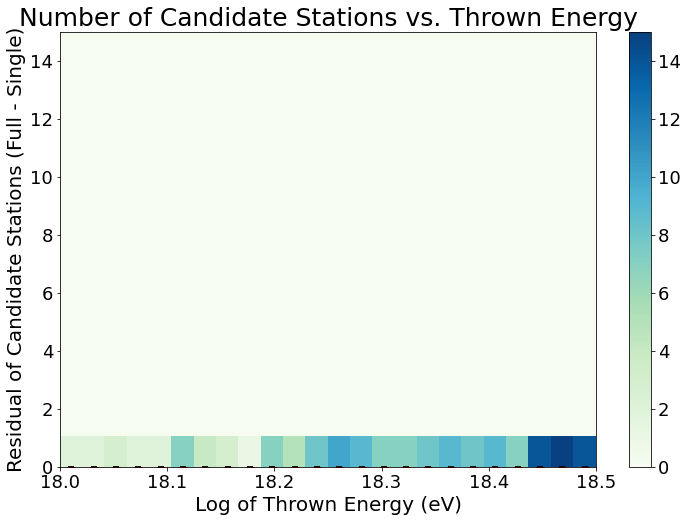

In [12]:
# Decide which plots to make

'''Plot types:
        - Comparison Plots
                1. Number of Candidate Stations vs. Energy vs. Simulation Type
                2. Reconstructed Energy vs. Simulation
                3. Trigger types vs. Energy vs. Simulation Type
                4. Mean/Std. Dev./Skew/Kurtosis Resolution vs. Thrown Energy
                5. Binning based on Cos^2(zenith)

                Plots from Sarazin Presentation

                6.
                
        - Non-Comparison Plots
                1. Number of Candidate Stations vs. Energy
                2. Energy Reconstructed vs. Energy Thrown
                3. Trigger types vs. Energy
                4. Number of Candidate Stations vs. Zenith Angle vs. Thrown Energy 
                5. Number of Events vs. Zenith Angle vs. Thrown Energy, Flatness of Data
                6. Mean/Std. Dev./Skew/Kurtosis Resolution vs. Thrown Energy
                7. Comparing Vertical and Inclined Events
                8. Binning based on Cos^2(zenith)

                
        
'''

shower_data = shower_data_1
lower_energy = 18.0
upper_energy = 18.5

if (comparison):
        untriggered_events_1, untriggered_events_2, unreconstructed_events_1, unreconstructed_events_2, reconstructed_events = clean_data(shower_data)

else:
        untriggered_events_1, unreconstructed_events_1, reconstructed_events = clean_data(shower_data)
        
plot_list = [1]
make_plots(reconstructed_events, plot_list, output_folder, lower_energy, upper_energy)

In [11]:
lower_energy = 18.0
upper_energy = 19.0

print(np.linspace(lower_energy, upper_energy, int(((upper_energy-lower_energy)/0.1) + 1)))

[18.  18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19. ]
